In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#### Loading Dataset
train=pd.read_csv('C:\\Users\\simra\\Downloads\\HealthInsurance_Prediction_solution\\Health_Insurance_train.csv')
test=pd.read_csv('C:\\Users\\simra\\Downloads\\HealthInsurance_Prediction_solution\\Health_Insurance_test.csv')
sample=pd.read_csv('C:\\Users\\simra\\Downloads\\HealthInsurance_Prediction_solution\\sample_submission.csv')

In [14]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [16]:
# Get the summary statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [17]:
train.shape

(381109, 12)

In [18]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [19]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [20]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
g={'Male':1,'Female':0}
train['Gender']=train['Gender'].map(g)

In [22]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [23]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [24]:
# By using sklearn and LableEncoder.....
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [25]:
train['Vehicle_Age']=lb.fit_transform(train['Vehicle_Age'])
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,Yes,44617.0,124.0,74,0


In [26]:
train['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
lb=LabelEncoder()
train['Vehicle_Damage']=lb.fit_transform(train['Vehicle_Damage'])

In [29]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [30]:
### Scaling the large data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [32]:
col=['Annual_Premium','Vintage','Policy_Sales_Channel']
train_scaler=train[col]

In [35]:
train[col]=std.fit_transform(train_scaler)

In [36]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,0.574539,-1.587234,0.748795,1
1,2,1,76,1,3.0,0,0,0,0.172636,-1.587234,0.342443,0
2,3,1,47,1,28.0,0,2,1,0.449053,-1.587234,-1.521998,1
3,4,1,21,1,11.0,1,1,0,-0.113018,0.737321,0.581474,0
4,5,0,29,1,41.0,1,1,0,-0.178259,0.737321,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,-0.022912,-1.587234,-0.792954,0
381105,381106,1,30,1,37.0,1,1,0,0.549093,0.737321,-0.279037,0
381106,381107,1,21,1,30.0,1,1,0,0.264543,0.884912,0.079509,0
381107,381108,0,68,1,14.0,0,2,1,0.816389,0.220753,-0.960275,0


In [37]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<AxesSubplot:xlabel='Vintage'>

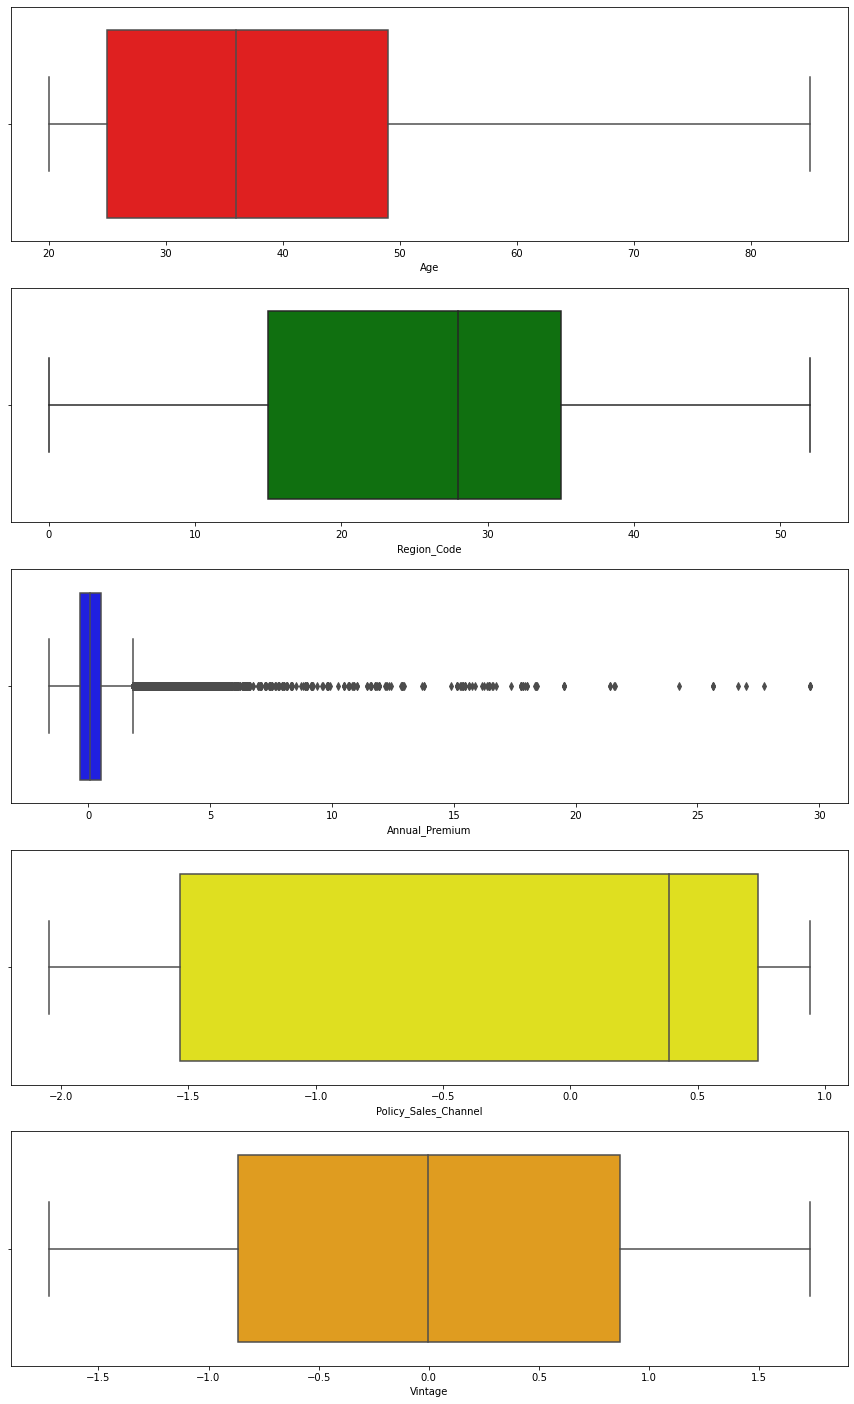

In [42]:
plt.figure(figsize=(15,25))
plt.subplot(5,1,1)
sns.boxplot(x=train.Age,color='red')


plt.subplot(5,1,2)
sns.boxplot(x=train.Region_Code,color='green')


plt.subplot(5,1,3)
sns.boxplot(x=train.Annual_Premium,color='blue')


plt.subplot(5,1,4)
sns.boxplot(x=train.Policy_Sales_Channel,color='yellow')


plt.subplot(5,1,5)
sns.boxplot(x=train.Vintage,color='orange')

1.7660872148961324

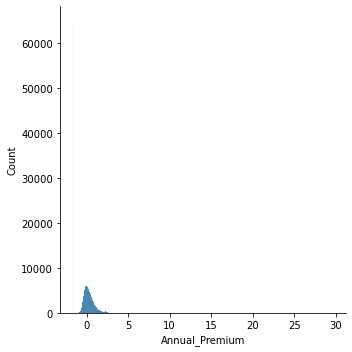

In [45]:
### As Annual Premium have outliers
#Removing Outlier from the column Annual_Premium......
sns.displot(train['Annual_Premium'])
train['Annual_Premium'].skew()

In [46]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,0.574539,-1.587234,0.748795,1
1,2,1,76,1,3.0,0,0,0,0.172636,-1.587234,0.342443,0
2,3,1,47,1,28.0,0,2,1,0.449053,-1.587234,-1.521998,1
3,4,1,21,1,11.0,1,1,0,-0.113018,0.737321,0.581474,0
4,5,0,29,1,41.0,1,1,0,-0.178259,0.737321,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,-0.022912,-1.587234,-0.792954,0
381105,381106,1,30,1,37.0,1,1,0,0.549093,0.737321,-0.279037,0
381106,381107,1,21,1,30.0,1,1,0,0.264543,0.884912,0.079509,0
381107,381108,0,68,1,14.0,0,2,1,0.816389,0.220753,-0.960275,0


In [50]:
X = train.copy()

In [51]:
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,0.574539,-1.587234,0.748795,1
1,2,1,76,1,3.0,0,0,0,0.172636,-1.587234,0.342443,0
2,3,1,47,1,28.0,0,2,1,0.449053,-1.587234,-1.521998,1
3,4,1,21,1,11.0,1,1,0,-0.113018,0.737321,0.581474,0
4,5,0,29,1,41.0,1,1,0,-0.178259,0.737321,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,-0.022912,-1.587234,-0.792954,0
381105,381106,1,30,1,37.0,1,1,0,0.549093,0.737321,-0.279037,0
381106,381107,1,21,1,30.0,1,1,0,0.264543,0.884912,0.079509,0
381107,381108,0,68,1,14.0,0,2,1,0.816389,0.220753,-0.960275,0


In [52]:
X = X.drop('Response',axis=1)

In [53]:
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,0.574539,-1.587234,0.748795
1,2,1,76,1,3.0,0,0,0,0.172636,-1.587234,0.342443
2,3,1,47,1,28.0,0,2,1,0.449053,-1.587234,-1.521998
3,4,1,21,1,11.0,1,1,0,-0.113018,0.737321,0.581474
4,5,0,29,1,41.0,1,1,0,-0.178259,0.737321,-1.378580
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,-0.022912,-1.587234,-0.792954
381105,381106,1,30,1,37.0,1,1,0,0.549093,0.737321,-0.279037
381106,381107,1,21,1,30.0,1,1,0,0.264543,0.884912,0.079509
381107,381108,0,68,1,14.0,0,2,1,0.816389,0.220753,-0.960275


In [54]:
Q1=X.quantile(0.25)
Q3=X.quantile(0.75)
IQR= Q3-Q1

In [55]:
Q1

id                      95278.000000
Gender                      0.000000
Age                        25.000000
Driving_License             1.000000
Region_Code                15.000000
Previously_Insured          0.000000
Vehicle_Age                 0.000000
Vehicle_Damage              0.000000
Annual_Premium             -0.357831
Policy_Sales_Channel       -1.531887
Vintage                    -0.864663
Name: 0.25, dtype: float64

In [56]:
Q3

id                      285832.000000
Gender                       1.000000
Age                         49.000000
Driving_License              1.000000
Region_Code                 35.000000
Previously_Insured           1.000000
Vehicle_Age                  1.000000
Vehicle_Damage               1.000000
Annual_Premium               0.513306
Policy_Sales_Channel         0.737321
Vintage                      0.868311
Name: 0.75, dtype: float64

In [57]:
IQR

id                      190554.000000
Gender                       1.000000
Age                         24.000000
Driving_License              0.000000
Region_Code                 20.000000
Previously_Insured           1.000000
Vehicle_Age                  1.000000
Vehicle_Damage               1.000000
Annual_Premium               0.871137
Policy_Sales_Channel         2.269208
Vintage                      1.732974
dtype: float64

In [58]:
X = X[~((X< (Q1 - 1.5*IQR))| (X >(Q3 +1.5*IQR)))]

C:\Users\simra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium'>

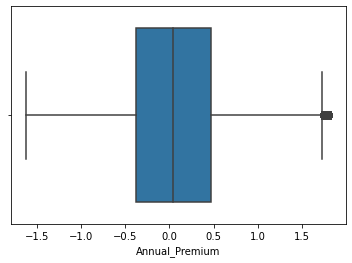

In [59]:
sns.boxplot(X['Annual_Premium'])

In [61]:
X.isnull().sum()

id                          0
Gender                      0
Age                         0
Driving_License           812
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium          10320
Policy_Sales_Channel        0
Vintage                     0
dtype: int64

In [62]:
final_data=X.fillna(IQR)

In [63]:
final_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [64]:
final_data.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,-0.001345,-0.001507,0.002970,-0.002837,-0.000630
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.002593,-0.111159,-0.002517
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.059473,-0.577826,-0.001264
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011412,0.043731,-0.000848
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.006232,-0.042420,-0.002750
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.010701,0.219381,0.002537
Vehicle_Age,-0.001345,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.029694,0.388551,0.002484
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.004090,-0.224377,-0.002064
Annual_Premium,0.002970,0.002593,0.059473,-0.011412,-0.006232,0.010701,0.029694,0.004090,1.000000,-0.113660,-0.000833
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113660,1.000000,0.000002


<AxesSubplot:>

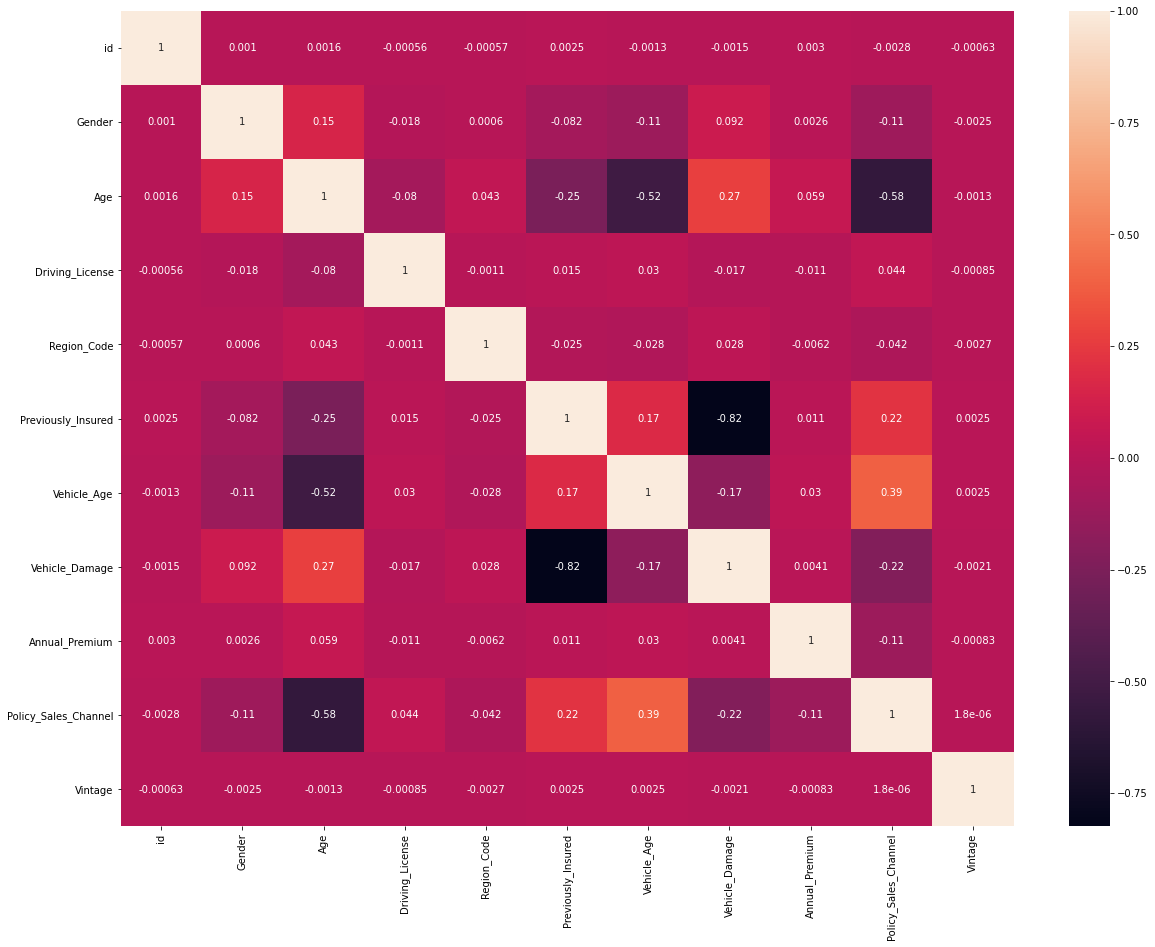

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(final_data.corr(),annot=True)

In [66]:
X=final_data
y=train['Response']

In [67]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()

In [70]:
model.fit(X,y)

LogisticRegression()

In [71]:
score=model.score(X,y)
score

0.877436638861848

In [73]:
pred_train=model.predict(X)
pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
#### Checking Errors
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
confusion_matrix(y,pred_train)

array([[334399,      0],
       [ 46710,      0]], dtype=int64)

In [76]:
accuracy_score(y,pred_train)

0.877436638861848

In [77]:
### Use Decision tree for improving accuracy
from sklearn.tree import DecisionTreeClassifier

In [78]:
model1 = DecisionTreeClassifier(criterion='entropy')
model_training = model1.fit(X,y)
pred1 = model_training.predict(X)
pred1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
confusion_matrix(y,pred1)

array([[334399,      0],
       [     0,  46710]], dtype=int64)

In [80]:
accuracy_score(y,pred1)

1.0

<AxesSubplot:>

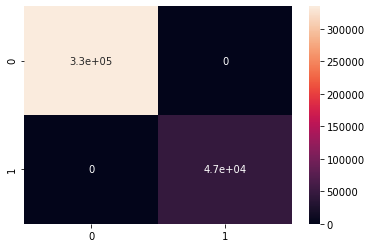

In [81]:
sns.heatmap(confusion_matrix(y,pred1),annot = True)

In [82]:
### Now Testing with Test Data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [83]:
test['Gender']=lb.fit_transform(test['Gender'])
test['Vehicle_Age']=lb.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage']=lb.fit_transform(test['Vehicle_Damage'])

In [84]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,1,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,0,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,1,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,0,0,62875.0,26.0,265


In [85]:
pred=model_training.predict(test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
df=pd.DataFrame(pred)
df.value_counts()

0    102807
1     24230
dtype: int64

In [88]:
## Exporting the output values along with id
result= pd.Series(data=pred,name='predicted_values')
final_result = pd.concat([sample['id'],result],axis=1)
final_result.to_csv('Prediction_HealthInsurance.csv')